In [2]:
import numpy as np
import pandas as pd
import geopandas as gpd
from matplotlib import pyplot as plt
import seaborn as sns

In [78]:
sns.set_style("darkgrid")
sns.set_context("notebook")

## Loading dataset

In [3]:
emitters_full = pd.read_csv("data/epa_facilities_report_emitters.csv")

In [4]:
emitters_full.head()

,address1,address2,city,co2e_emission,county,facility_name,county_fips,gas_code,gas_name,facility_id,ghg_quantity,latitude,longitude,year,state,state_name,subpart_category,subpart_name,subpart_type,zip
0,5105 LAKE TERRELL ROAD,NaN,FERNDALE,138.250,WHATCOM COUNTY,PSE Ferndale Generating Station,53073.0,CH4,Methane,1000001,5.530,48.828707,-122.685533,2010,WA,WASHINGTON,Stationary Combustion,C,E,98248
1,5105 LAKE TERRELL ROAD,NaN,FERNDALE,164.794,WHATCOM COUNTY,PSE Ferndale Generating Station,53073.0,N2O,Nitrous Oxide,1000001,0.553,48.828707,-122.685533,2010,WA,WASHINGTON,Stationary Combustion,C,E,98248
2,5105 LAKE TERRELL ROAD,NaN,FERNDALE,292987.900,WHATCOM COUNTY,PSE Ferndale Generating Station,53073.0,CO2,Carbon Dioxide,1000001,292987.900,48.828707,-122.685533,2010,WA,WASHINGTON,Stationary Combustion,C,E,98248
3,5105 LAKE TERRELL ROAD,NaN,FERNDALE,17.000,WHATCOM COUNTY,PSE Ferndale Generating Station,53073.0,CH4,Methane,1000001,0.680,48.828707,-122.685533,2011,WA,WASHINGTON,Stationary Combustion,C,E,98248
4,5105 LAKE TERRELL ROAD,NaN,FERNDALE,20.264,WHATCOM COUNTY,PSE Ferndale Generating Station,53073.0,N2O,Nitrous Oxide,1000001,0.068,48.828707,-122.685533,2011,WA,WASHINGTON,Stationary Combustion,C,E,98248


## Cleaning dataset

We don't need all the data in the dataset, so we just select the columns of interest to us.

In [5]:
emitters = emitters_full[["co2e_emission", "facility_name", "gas_code", "gas_name",
                          "ghg_quantity", "latitude", "longitude", "year", "state",
                          "state_name", "subpart_category", "subpart_name"]]

emitters.head()

,co2e_emission,facility_name,gas_code,gas_name,ghg_quantity,latitude,longitude,year,state,state_name,subpart_category,subpart_name
0,138.250,PSE Ferndale Generating Station,CH4,Methane,5.530,48.828707,-122.685533,2010,WA,WASHINGTON,Stationary Combustion,C
1,164.794,PSE Ferndale Generating Station,N2O,Nitrous Oxide,0.553,48.828707,-122.685533,2010,WA,WASHINGTON,Stationary Combustion,C
2,292987.900,PSE Ferndale Generating Station,CO2,Carbon Dioxide,292987.900,48.828707,-122.685533,2010,WA,WASHINGTON,Stationary Combustion,C
3,17.000,PSE Ferndale Generating Station,CH4,Methane,0.680,48.828707,-122.685533,2011,WA,WASHINGTON,Stationary Combustion,C
4,20.264,PSE Ferndale Generating Station,N2O,Nitrous Oxide,0.068,48.828707,-122.685533,2011,WA,WASHINGTON,Stationary Combustion,C


## EDA

Let's see how the total emissions have developed over the years.


/Users/dario/Repos/ghg-emissions-usa/venv/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/dario/Repos/ghg-emissions-usa/venv/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/dario/Repos/ghg-emissions-usa/venv/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


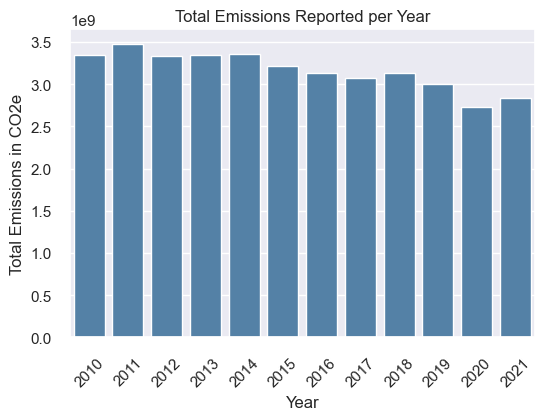

In [79]:
emissions_per_year = emitters.groupby("year")["co2e_emission"].sum().reset_index()
#print(emissions_per_year)
plt.figure(figsize=(6, 4))
sns.barplot(data=emissions_per_year, x="year", y="co2e_emission", color="steelblue")
plt.xlabel("Year")
plt.ylabel("Total Emissions in CO2e")
plt.title("Total Emissions Reported per Year")
plt.xticks(rotation=45)
plt.show()

It seems that there is a slight downward trend in the total emissions. However, we also need to look at how many facilities did report their emissions in those years.

/Users/dario/Repos/ghg-emissions-usa/venv/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/dario/Repos/ghg-emissions-usa/venv/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/dario/Repos/ghg-emissions-usa/venv/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


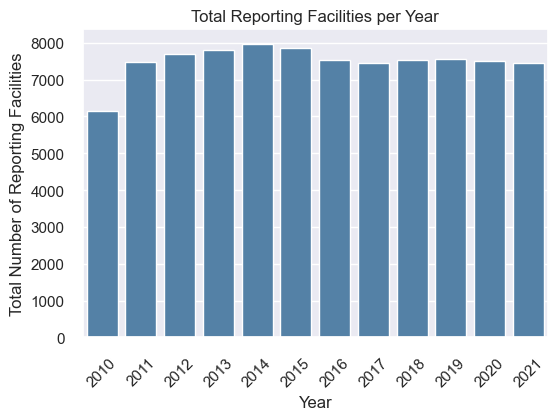

In [80]:
facilities_per_year = emitters.groupby("year")["facility_name"].nunique().reset_index()
facilities_per_year.columns = ["year", "distinct_facility_count"]


plt.figure(figsize=(6, 4))
sns.barplot(data=facilities_per_year, x="year", y="distinct_facility_count", color="steelblue")
plt.xlabel("Year")
plt.ylabel("Total Number of Reporting Facilities")
plt.title("Total Reporting Facilities per Year")
plt.xticks(rotation=45)
plt.show()

The number of reporting facilities has increased in the first couple of years and reached a peak in 2014. After that, it decreased again and has remained at around the same level from 2016 on.

With that in mind, we can have again a look at the total emissions graph above and see that from 2016 to 2021, the total emissions have decreased with 2020 and 2021 being clearly lower than the years before.